# BMI 826 / CS 838: Homework Assignment 1

This project will be done using iPython notebooks. These are convenient ways for you to quickly and easily interact with the code. A notebook contains many blocks of code, each of which can be run independently. You can run a cell with ctrl+enter or shift+enter (to move to the next cell).

If there are any notes you wish to leave for the TAs as they test your code, you may leave them here.

## Setup

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


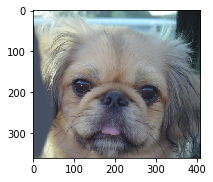

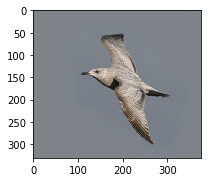

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from utils import load_image, save_image, resize_image
from student_code import Compose, Scale, RandomHorizontalFlip, RandomRotate, RandomSizedCrop
# from student_code import RandomColor, FastRandomColor, FasterRandomColor
from student_code import FastRandomColor, FasterRandomColor
from student_code import FasterRandomColor as RandomColor
%load_ext autoreload
%autoreload 2

image1 = load_image('../data/dog.bmp')
image2 = load_image('../data/bird.bmp')

# display the dog and cat images
plt.figure(figsize=(3,3)); plt.imshow(image1);
plt.figure(figsize=(3,3)); plt.imshow(image2);


In [7]:
import time
def estimate(func, image, size_list, n=5):
    res = []
    for s in size_list:
        tmp = cv2.resize(image, (s,s))
        print("="*10+str(func.__class__)+"="*10)
        st = time.time()
        for _ in range(n):
            _ = func(tmp)
        avgTime = (time.time()-st)/n
        res.append(avgTime)
        print(avgTime)
    return res    

a = RandomColor(0.15)
b = FastRandomColor(0.15)
c = FasterRandomColor(0.15)

size_list = [32, 64, 128, 256, 512]

In [50]:
A = estimate(a, tmp, size_list, n=3)

==========<class 'student_code.RandomColor'>==========
0.134779691696167
==========<class 'student_code.RandomColor'>==========
0.44274266560872394
==========<class 'student_code.RandomColor'>==========
1.6773823102315266
==========<class 'student_code.RandomColor'>==========
6.501272042592366
==========<class 'student_code.RandomColor'>==========
28.03545395533244


In [51]:
B = estimate(b, tmp, size_list, n=3)
C = estimate(c, tmp, size_list, n=3)

==========<class 'student_code.FastRandomColor'>==========
0.03495399157206217
==========<class 'student_code.FastRandomColor'>==========
0.05645402272542318
==========<class 'student_code.FastRandomColor'>==========
0.1542945702870687
==========<class 'student_code.FastRandomColor'>==========
0.5415090719858805
==========<class 'student_code.FastRandomColor'>==========
1.9854950904846191
==========<class 'student_code.FasterRandomColor'>==========
0.00025073687235514325
==========<class 'student_code.FasterRandomColor'>==========
0.0002986590067545573
==========<class 'student_code.FasterRandomColor'>==========
0.00043193499247233075
==========<class 'student_code.FasterRandomColor'>==========
0.0015529791514078777
==========<class 'student_code.FasterRandomColor'>==========
0.007175366083780925


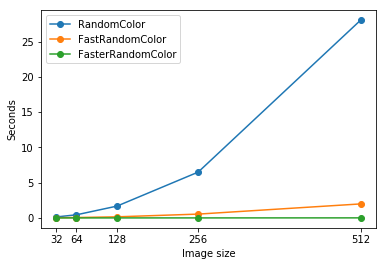

In [81]:
plt.plot(size_list, A, '-o', label="RandomColor")
plt.plot(size_list, B, '-o', label="FastRandomColor")
plt.plot(size_list, C, '-o', label="FasterRandomColor")
plt.legend()
plt.xticks(size_list); plt.xlabel("Image size")
plt.ylabel("Seconds")
plt.savefig('eval_RandomColor.png', dpi=100)

## Create Image Transforms

In [4]:
# create an empty list and add transforms one by one
transforms = []
transforms.append(Scale(320))
transforms.append(RandomHorizontalFlip())
transforms.append(RandomColor(0.15))
transforms.append(RandomRotate(90))
transforms.append(RandomSizedCrop(224))
comp_transforms = Compose(transforms)
print(comp_transforms)


Scale [Exact Size (320, 320)]
Random Horizontal Flip
Random Color [Range 0.85 - 1.15%]
Random Rotation [Range -90.00 - 90.00 Degree]
Random Crop[Size (224, 224); Area 0.25 - 1.00%; Ratio 0.80 - 1.20%]



## Apply Transforms to Images
All functions you need to implement in this project can be found in student_code.py. You will need to fill in the missing code pieces in the Scale, RandomSizedCrop, RandomRotate and RandomColor.

found suitable crop.


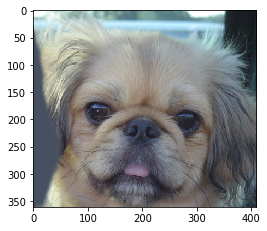

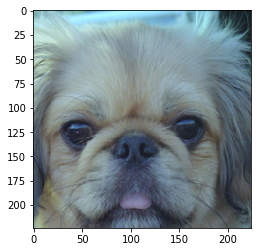

In [5]:
transformed_image1 = comp_transforms(image1)

# let's take a look at the results!
plt.figure(figsize=(4,4)); plt.imshow(image1);
plt.figure(figsize=(4,4)); plt.imshow(transformed_image1);


## Create More Results

found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.


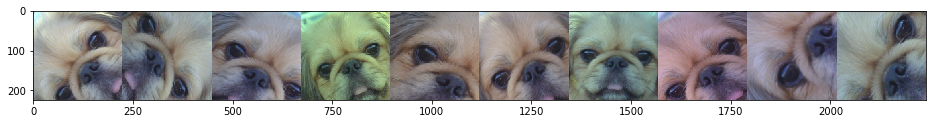

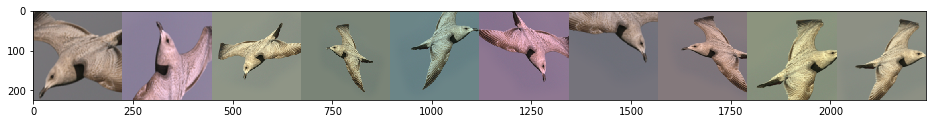

In [78]:
vis_img_list = []
for img in [image1, image2]:
    img_list = []
    for idx in range(10):
        img_list.append(comp_transforms(img))
    vis_img = np.concatenate(img_list, axis=1)
    vis_img_list.append(vis_img)

for vis_img in vis_img_list:
    plt.figure(figsize=(16,16)); plt.imshow(vis_img);

## Save Results

In [79]:
for file_idx, vis_img in zip(range(len(vis_img_list)), vis_img_list):
    save_image('../results/outputs_{:d}.jpg'.format(file_idx), vis_img)

# The study of the order of transforms

In [98]:
# create an empty list and add transforms one by one
transforms = []
transforms.append(Scale(320))
transforms.append(RandomHorizontalFlip())
transforms.append(RandomRotate(90))
transforms.append(RandomColor(0.15))
transforms.append(RandomSizedCrop(224))
comp_transforms = Compose(transforms)
print(comp_transforms)


Scale [Exact Size (320, 320)]
Random Horizontal Flip
Random Rotation [Range -90.00 - 90.00 Degree]
Random Color [Range 0.85 - 1.15%]
Random Crop[Size (224, 224); Area 0.25 - 1.00%; Ratio 0.80 - 1.20%]



found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.
found suitable crop.


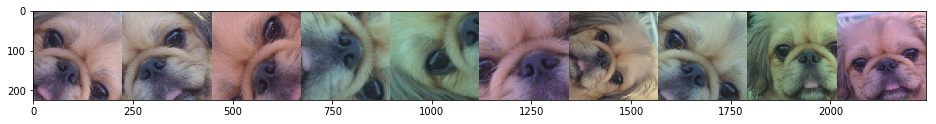

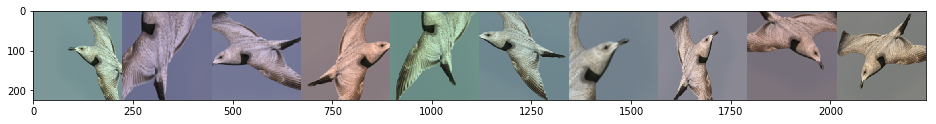

In [111]:
final_img_list = []
for img in [image1, image2]:
    img_list = []
    maxW, maxH = 0, 0
    for idx in range(10):
        timg = comp_transforms(img)
        img_list.append(timg)
        maxH = max(maxH, timg.shape[0])
        maxW = max(maxW, timg.shape[1])
    vis_img_list = []
    for t in img_list:
        canvas = np.zeros((maxH, maxW, 3), dtype=np.uint8)
        h,w = t.shape[:2]
        xi, yi = (maxH-h)//2, (maxW-w)//2
        canvas[xi:(xi+h),yi:(yi+w),:] = t
        vis_img_list.append(canvas)
        
    vis_img = np.concatenate(vis_img_list, axis=1)
    final_img_list.append(vis_img)

for vis_img in final_img_list:
    plt.figure(figsize=(16,16)); plt.imshow(vis_img);

In [112]:
for file_idx, vis_img in zip(range(len(final_img_list)), final_img_list):
    save_image('../results/order-changed-2-outputs_{:d}.jpg'.format(file_idx), vis_img)

## Data Augmentation and Input Pipeline

In [11]:
from student_code import ToTensor, SimpleDataset
import torch

# set up the transforms (make sure you convert numpy array to pytorch tensor)
transforms = []
transforms.append(Scale(320))
transforms.append(RandomHorizontalFlip())
transforms.append(RandomColor(0.15))
transforms.append(RandomRotate(30))
transforms.append(RandomSizedCrop(224))
transforms.append(ToTensor())
comp_transforms = Compose(transforms)

simple_transforms = Compose([RandomSizedCrop(224), ToTensor()])

# let us try a toy dataset
dataset = SimpleDataset('../data', file_ext='bmp', transforms=comp_transforms)
dataset2 = SimpleDataset('../data', file_ext='bmp', transforms=simple_transforms)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True)

# loop over the data set
for img, label in data_loader:
    print(img.shape)
    print(label)


torch.Size([2, 3, 224, 224])
('cat', 'bird')
torch.Size([2, 3, 224, 224])
('plane', 'fish')
torch.Size([1, 3, 224, 224])
('dog',)


# Evaluation of different setting 

In [18]:
data_loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

st = time.time()
# loop over the data set
for i in range(100):
    print(i, end='\r')
    for img, label in data_loader:
        continue
print((time.time()-st)/100)

0.25846946001052856


In [19]:
data_loader = torch.utils.data.DataLoader(dataset, batch_size=5, shuffle=False)

st = time.time()
# loop over the data set
for i in range(100):
    print(i, end='\r')
    for img, label in data_loader:
        continue
print((time.time()-st)/100)

0.2616561007499695


In [20]:
data_loader = torch.utils.data.DataLoader(dataset, batch_size=5, shuffle=True)

st = time.time()
# loop over the data set
for i in range(100):
    print(i, end='\r')
    for img, label in data_loader:
        continue
print((time.time()-st)/100)

0.2628651213645935


## Simple transform 

In [12]:
data_loader = torch.utils.data.DataLoader(dataset2, batch_size=5, shuffle=True)

st = time.time()
# loop over the data set
for i in range(100):
    print(i, end='\r')
    for img, label in data_loader:
        continue
print((time.time()-st)/100)

0.012943050861358642
